## Import Libaries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

## Import data

In [2]:
movie = pd.read_csv("movies.csv")
rating = pd.read_csv("ratings.csv")
tag = pd.read_csv("tags.csv")


In [3]:
movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [10]:
rating

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
1799995,12151,8874,4.5,1260223148
1799996,12151,8905,2.5,1260222236
1799997,12151,8938,3.5,1260224079
1799998,12151,8950,4.0,1260223069


In [5]:
tag

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078
...,...,...,...,...
465559,138446,55999,dragged,1358983772
465560,138446,55999,Jason Bateman,1358983778
465561,138446,55999,quirky,1358983778
465562,138446,55999,sad,1358983772


 # Clean 'genres' Column In Movie

In [6]:
def movie_cleaner(a):
    return a.replace("|", " ")

In [7]:
movie.genres = movie.genres.apply(movie_cleaner) # clean 'genres' column
movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


## Combining Movieid With Rating

In [11]:
rating=rating.iloc[:, :] 
movies_rating = rating.pivot( columns = "userId", index = "movieId", values = "rating").fillna(0) 
movies_rating

userId,1,2,3,4,5,6,7,8,9,10,...,12142,12143,12144,12145,12146,12147,12148,12149,12150,12151
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,4.0,0.0,0.0,5.0,0.0,4.0,0.0,4.0,...,0.0,4.0,5.0,0.0,0.0,0.0,4.5,4.0,3.0,0.0
2,3.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
3,0.0,4.0,0.0,0.0,0.0,3.0,3.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## TfidfVectorize

In [12]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movie['genres'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=movie.index.tolist())
print(tfidf_df.shape)
tfidf_df

(27278, 23)


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.0,0.419151,0.518269,0.505742,0.264175,0.0,0.0,0.000000,0.479736,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.515311,0.000000,0.621768,0.000000,0.0,0.0,0.000000,0.589796,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,0.000000,0.602583,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.798056,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.000000,0.544541,0.0,0.0,0.428212,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.721186,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
27274,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
27275,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
27276,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.707107,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


## Plot Variance
We used 19 dimensions for latent_matrix_1 and 20 dimensions for latent_matrix_2....how do we know how many dimensions we need?

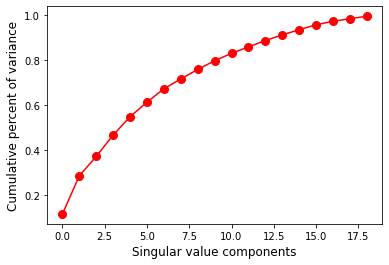

In [13]:
svd = TruncatedSVD(n_components=19)
latent_matrix = svd.fit_transform(tfidf_df)
# plot var expalined to see what latent dimensions to use
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='red')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)        
plt.show()

In [14]:

n = 20                                                                                     
latent_matrix_1_df = pd.DataFrame(latent_matrix[:, 0:n], index = movie['title'].tolist()) 
latent_matrix_1_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Toy Story (1995),1.393244e-01,2.906857e-01,8.612721e-02,-1.008326e-02,-2.285145e-02,-1.857907e-01,3.457009e-01,3.396661e-02,-1.197399e-01,7.518206e-01,-7.768160e-03,-8.810722e-02,5.354134e-02,-3.590142e-01,5.502963e-02,3.837842e-02,9.271921e-02,-7.805993e-04,-1.270854e-16
Jumanji (1995),4.685632e-02,5.324076e-02,1.121998e-01,-9.804413e-03,4.991308e-02,-1.998167e-01,3.588394e-01,3.627658e-02,-1.483382e-01,7.484842e-01,-1.312339e-02,-3.482354e-02,-4.647791e-02,-2.144053e-01,-1.486301e-01,1.206831e-01,-3.753228e-01,4.948861e-04,-2.146529e-16
Grumpier Old Men (1995),3.859120e-01,6.712204e-01,-1.200327e-01,-1.745001e-02,6.096254e-01,4.384344e-02,-6.847773e-02,-1.470962e-02,1.520552e-02,-5.179573e-02,-1.412194e-02,1.295844e-02,-4.927804e-02,-3.142474e-02,1.262593e-02,-2.220406e-02,6.277427e-04,2.421692e-04,4.219397e-17
Waiting to Exhale (1995),7.294304e-01,4.312199e-01,-1.662500e-01,-8.410606e-03,4.919368e-01,5.423952e-02,-4.445743e-02,-1.387228e-02,1.603673e-02,-4.888815e-02,-2.981722e-02,1.279328e-02,-4.538437e-02,-2.859215e-02,1.188825e-02,-2.081374e-02,1.951793e-03,-1.014823e-03,1.682651e-17
Father of the Bride Part II (1995),3.615985e-01,8.920904e-01,-7.417663e-02,-7.798567e-03,-2.484890e-01,2.580067e-02,-2.707509e-02,-4.831928e-02,1.681859e-02,-3.053249e-02,1.099564e-02,1.274145e-02,-2.726934e-02,4.348408e-03,-7.694192e-03,-1.540300e-03,6.653207e-03,3.134129e-03,5.320607e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kein Bund für's Leben (2007),3.615985e-01,8.920904e-01,-7.417663e-02,-7.798567e-03,-2.484890e-01,2.580067e-02,-2.707509e-02,-4.831928e-02,1.681859e-02,-3.053249e-02,1.099564e-02,1.274145e-02,-2.726934e-02,4.348408e-03,-7.694192e-03,-1.540300e-03,6.653207e-03,3.134129e-03,5.320607e-17
"Feuer, Eis & Dosenbier (2002)",3.615985e-01,8.920904e-01,-7.417663e-02,-7.798567e-03,-2.484890e-01,2.580067e-02,-2.707509e-02,-4.831928e-02,1.681859e-02,-3.053249e-02,1.099564e-02,1.274145e-02,-2.726934e-02,4.348408e-03,-7.694192e-03,-1.540300e-03,6.653207e-03,3.134129e-03,5.320607e-17
The Pirates (2014),4.068855e-02,3.063741e-02,1.317554e-01,-8.189134e-03,5.592679e-02,-2.628025e-01,3.559778e-01,-1.172346e-02,-1.671566e-01,5.358236e-01,3.175425e-02,4.880796e-02,-4.644765e-01,4.657648e-01,-4.684796e-02,-1.567007e-01,5.229858e-02,-1.494646e-03,-4.877365e-18
Rentun Ruusu (2001),2.737132e-18,-4.141272e-18,-9.347964e-19,1.437499e-17,-3.771018e-18,-8.693717e-18,6.189367e-17,1.779273e-16,-4.852403e-17,6.545658e-17,-9.560486e-17,-5.761803e-17,6.610057e-17,1.995563e-17,-8.918471e-17,5.506782e-16,-1.520785e-16,-1.333862e-14,1.000000e+00


## Collaborative Filtering

In [15]:
svd = TruncatedSVD(n_components = 20)               
latent_matrix_2 = svd.fit_transform(movies_rating)
movie[movie.movieId.isin(movies_rating.index)]                                                     

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27124,130496,Big Game (2015),Action Adventure
27132,130512,Hippocrates (2014),Comedy Drama
27154,130642,Backcountry (2014),Drama Horror Thriller
27155,130644,The Garden of Sinners - Chapter 5: Paradox Par...,Animation


In [16]:
latent_matrix_2_df = pd.DataFrame(latent_matrix_2, index=movie.title[movie.movieId.isin(movies_rating.index)])
latent_matrix_2_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
title,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),175.448363,32.140025,39.312472,11.454899,17.606485,50.061364,-15.776896,25.654661,56.494055,-6.063895,-11.332721,-12.040879,50.454577,-15.625100,-11.873009,23.027112,-14.892921,41.350748,6.277132,-14.317597
Jumanji (1995),78.580716,26.928747,37.480304,-23.436800,-8.695561,6.571550,-18.654338,13.357106,1.294240,-1.056172,-6.436522,11.739305,-11.249728,-11.693000,-6.951374,-5.729625,-12.293422,-2.095867,-4.290772,-11.890283
Grumpier Old Men (1995),34.039610,24.269903,7.263646,-18.417631,-5.472975,2.352837,-0.954497,1.647331,36.202681,-7.561774,-22.217602,-0.808172,11.814403,4.120258,-14.476489,-5.639741,-5.783517,1.076178,-13.240956,-3.621277
Waiting to Exhale (1995),9.036737,10.575843,-0.844022,-4.061783,-6.762870,0.955552,1.826793,0.611103,5.169326,0.273148,2.058364,2.873766,0.043451,5.167500,1.143059,-3.316113,-0.159445,-5.293614,-1.497465,-4.023861
Father of the Bride Part II (1995),30.329210,24.708188,12.179344,-19.164700,-11.288607,6.780358,-0.787894,2.727068,31.830527,-9.311939,-16.117324,1.476839,9.184293,2.504254,-12.055865,-7.620849,-4.943738,2.298632,-13.877681,-3.890941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Big Game (2015),0.045396,-0.044662,0.013934,0.000062,-0.029159,-0.063832,-0.047058,-0.073128,-0.012704,-0.018832,0.004230,-0.017484,-0.027785,-0.014565,0.001013,-0.001594,0.009215,0.054632,-0.004035,-0.037854
Hippocrates (2014),0.135508,-0.043514,-0.208401,-0.036727,-0.394636,-0.149893,-0.008257,-0.194187,0.041994,-0.141018,0.270664,-0.263686,0.217050,0.000229,-0.346012,0.121563,0.235885,-0.401036,0.269962,0.025244
Backcountry (2014),0.091802,-0.063068,-0.060054,0.047910,-0.113935,-0.133402,-0.035272,0.067517,0.009165,-0.010552,0.055133,0.014784,-0.012666,-0.059838,-0.126195,0.057448,-0.028924,-0.041626,0.137687,-0.094705


## Cosine Similarity

In [17]:
latent_matrix_1= pd.DataFrame(latent_matrix, index = movie.movieId) 
latent_matrix_1= latent_matrix_1.loc[movies_rating.index]   
latent_matrix_1 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
movieId,,,,,,,,,,,,,,,,,,,
1,0.139324,0.290686,0.086127,-0.010083,-0.022851,-0.185791,0.345701,0.033967,-0.119740,0.751821,-0.007768,-0.088107,0.053541,-0.359014,0.055030,0.038378,0.092719,-0.000781,-1.270854e-16
2,0.046856,0.053241,0.112200,-0.009804,0.049913,-0.199817,0.358839,0.036277,-0.148338,0.748484,-0.013123,-0.034824,-0.046478,-0.214405,-0.148630,0.120683,-0.375323,0.000495,-2.146529e-16
3,0.385912,0.671220,-0.120033,-0.017450,0.609625,0.043843,-0.068478,-0.014710,0.015206,-0.051796,-0.014122,0.012958,-0.049278,-0.031425,0.012626,-0.022204,0.000628,0.000242,4.219397e-17
4,0.729430,0.431220,-0.166250,-0.008411,0.491937,0.054240,-0.044457,-0.013872,0.016037,-0.048888,-0.029817,0.012793,-0.045384,-0.028592,0.011888,-0.020814,0.001952,-0.001015,1.682651e-17
5,0.361599,0.892090,-0.074177,-0.007799,-0.248489,0.025801,-0.027075,-0.048319,0.016819,-0.030532,0.010996,0.012741,-0.027269,0.004348,-0.007694,-0.001540,0.006653,0.003134,5.320607e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130496,0.078906,0.044382,0.351088,-0.043617,0.066362,-0.548414,0.496089,-0.059381,-0.346107,0.100415,-0.131449,0.103876,-0.223056,0.285272,-0.015495,-0.147286,0.017961,0.007882,1.143890e-16
130512,0.833782,0.448122,-0.141714,0.004492,-0.280452,0.041384,0.003870,-0.038819,0.016535,-0.027005,-0.015977,0.011579,-0.022667,0.003138,-0.005357,-0.002291,0.007228,0.000683,1.107139e-17
130642,0.410093,-0.141401,0.622101,-0.094802,-0.025941,0.591217,0.025646,-0.114420,-0.152261,0.005639,-0.036702,-0.149779,-0.068156,-0.001251,0.013875,-0.004095,0.003765,-0.002535,-5.980164e-17


## Function to Recommend Simliar Movies
Three Methods are used. (Hybrid,Content,Collab)

In [38]:
def rec_similar_movies(title, how):
 
    a_1 = np.array(latent_matrix_1_df.loc[title]).reshape(1, -1)
    a_2 = np.array(latent_matrix_2_df.loc[title]).reshape(1, -1)


    score_1_content = cosine_similarity(latent_matrix_1_df, a_1).reshape(-1)
    score_2_collab = cosine_similarity(latent_matrix_2_df, a_2).reshape(-1)
    score_3_trim = cosine_similarity(latent_matrix_1, a_1).reshape(-1)
    hybrid = ((score_3_trim +  score_2_collab)/2.0)

    

    if how == "hybrid":

        dictDF = {'hybrid': hybrid}
        
        sim_movies = pd.DataFrame(dictDF, index = latent_matrix_2_df.index)
        
        sim_movies.sort_values('hybrid', ascending = False, inplace = True)
        
        print(sim_movies)
    
    if how == "content":
        dictDF = {'content':  score_1_content}
        
        sim_movies = pd.DataFrame(dictDF, index = latent_matrix_1_df.index)
        
        sim_movies.sort_values('content', ascending = False, inplace = True)
        
        print(sim_movies)
    
    if how == "collab":
        dictDF = {'collab':  score_2_collab}
        sim_movies = pd.DataFrame(dictDF, index = latent_matrix_2_df.index)
        sim_movies.sort_values('collab', ascending = False, inplace = True)
        print(sim_movies)
        

    

    
    
    return None

 

## Testing Movie Recommender

In [39]:
rec_similar_movies("Toy Story (1995)", "collab")

                                              collab
title                                               
Toy Story (1995)                            1.000000
Willy Wonka & the Chocolate Factory (1971)  0.911604
Independence Day (a.k.a. ID4) (1996)        0.884475
Mission: Impossible (1996)                  0.861092
Twister (1996)                              0.829511
...                                              ...
Autumn Heart, The (1999)                   -0.065462
25 Watts (2001)                            -0.067876
Clonus Horror, The (1979)                  -0.072449
Antares (2004)                             -0.075115
Ripe (1996)                                -0.121781

[16505 rows x 1 columns]


In [28]:
rec_similar_movies("Toy Story (1995)", "hybrid")

                                        hybrid
title                                         
Toy Story (1995)                      1.000000
Toy Story 2 (1999)                    0.905876
Monsters, Inc. (2001)                 0.865879
Antz (1998)                           0.838396
Shrek (2001)                          0.834511
...                                        ...
Animal Love (Tierische Liebe) (1996) -0.027076
Autumn Heart, The (1999)             -0.032729
Clonus Horror, The (1979)            -0.036398
Antares (2004)                       -0.037556
Ripe (1996)                          -0.060888

[16505 rows x 1 columns]


In [40]:
rec_similar_movies("Toy Story (1995)", "content")

                                                     content
Toy Story (1995)                                    1.000000
Wild, The (2006)                                    1.000000
Toy Story Toons: Small Fry (2011)                   1.000000
Emperor's New Groove, The (2000)                    1.000000
DuckTales: The Movie - Treasure of the Lost Lam...  1.000000
...                                                      ...
Invaders from Space (1965)                         -0.000515
Flash Gordon's Trip to Mars (1938)                 -0.000515
Aeon Flux (2005)                                   -0.000515
Rollerball (2002)                                  -0.000515
Incredible Hulk, The (2008)                        -0.000515

[27278 rows x 1 columns]
